In [902]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [903]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# image folder
folder = "/content/drive/MyDrive/CO543_Mini_Project/images/"

In [904]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

def apply_sobel(img):
  img_float32 = np.float32(img)
  dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) 
  dft_shift =np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows/2 , cols/2 # center
  # Here we define the matrices associated with the Sobel filter
  Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
  Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
  """
        _               _                   _                _
      |                 |                 |                  |
      | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
  Gx = | 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
      | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
      |_               _|                 |_                _|
  """
  [rows, cols] = np.shape(img)  # we need to know the shape of the input grayscale image
  sobel_mask = np.zeros(shape=(rows, cols,2))  # initialization of the output image array (all elements are 0)

  # Now we "sweep" the image in both x and y directions and compute the output
  for i in range(rows - 2):
      for j in range(cols - 2):
          gx = np.sum(np.multiply(Gx, img[i:i + 3, j:j + 3]))  # x direction
          gy = np.sum(np.multiply(Gy, img[i:i + 3, j:j + 3]))  # y direction
          sobel_mask[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

  fshift = dft_shift*sobel_mask
  filterMag = 20 * np.log(cv2.magnitude(sobel_mask[:, :, 0], sobel_mask[:, :, 1]))
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
  historiginal= cv2.calcHist([img],[0],None,[256],[0,256])
  cv2.imwrite('sobel_output.png', img_back)
  plt.plot(historiginal)
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
  plt.title('sobel filter Image'), plt.xticks([]), plt.yticks([]) 
  plt.show()
  return img_back

In [905]:
def plot(img1,img2,img3,title1="", title2="", title3=""):
  fig = plt.figure(figsize = (25,10))
  plt.subplot(131),plt.imshow(img1, cmap = 'gray')
  plt.title(title1),plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(img2, cmap = 'gray')
  plt.title(title2),plt.xticks([]), plt.yticks([]) 
  plt.subplot(133),plt.imshow(img3, cmap = 'gray')
  plt.title(title3),plt.xticks([]), plt.yticks([]) 
  plt.show()

def mag_spectrum(img,name):
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))
  fig = plt.figure(figsize=(10, 10))
  plt.subplot(121), plt.imshow(img, cmap = 'gray')
  plt.title('Image '+name), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum of '+name), plt.xticks([]), plt.yticks([])

def fd_filter(img,kernel, title1):
  print(title1)
  s = sum(sum(kernel))
  if s == 0:
    s = 1
  h = kernel / s
  h = kernel.astype(int)
  row = img.shape[0]
  col = img.shape[1]
  H = np.pad(h,(((row-3)//2, (row-2)//2),((col-3)//2, (col-2)//2)))
  FI = np.fft.fft2(img)
  FH = np.fft.fft2(H)
  FH_shift= np.fft.fftshift(FH)
  mag_spectrum = 20*np.log(np.abs(FH_shift)+1)
  FJ = FI*FH
  J = np.fft.ifft2(FJ)
  J = np.fft.ifftshift(J)
  fig = plt.figure(figsize = (25,10))
  plt.subplot(131),plt.imshow(img, cmap = 'gray')
  plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(mag_spectrum, cmap = 'gray')
  plt.xticks([]), plt.yticks([]) 
  plt.subplot(133),plt.imshow(J.real, cmap = 'gray')
  plt.title("result"), plt.xticks([]), plt.yticks([]) 
  plt.show()

def plot3(img1,img2,img3,title):
  print(title)
  fig = plt.figure(figsize = (25,10))
  plt.subplot(131),plt.imshow(img1, cmap = 'gray')
  plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(img2, cmap = 'gray')
  plt.xticks([]), plt.yticks([]) 
  plt.subplot(133),plt.imshow(img3, cmap = 'gray')
  plt.xticks([]), plt.yticks([]) 
  plt.show()

In [906]:
# read images
imgD1 = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/D1.PNG",0)
imgD2 = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/D2.PNG",0)
imgD3 = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/D3.PNG",0)
# read images
rD1 = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/Super resolution/D1_super.jpg",0)
rD2 = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/Super resolution/D2_super.jpg",0)
rD3 = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/Super resolution/D3_super.jpg",0)

In [907]:
#------------------------------------------------------
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0
                
    return H
#-----------------------------------------------------

In [908]:
def notch_reject(img_back):
  f = np.fft.fft2(img_back)
  fshift = np.fft.fftshift(f)
  phase_spectrumR = np.angle(fshift)
  magnitude_spectrum = 20*np.log(np.abs(fshift))

  img_shape = img_back.shape

  H1 = notch_reject_filter(img_shape, 1, 4, 0)
  H2 = notch_reject_filter(img_shape, 1, 8, 0)
  H3 = notch_reject_filter(img_shape, 1, 2, 0)
  H4 = notch_reject_filter(img_shape, 1, 8, 0)

  NotchFilter = H1*H2*H3*H4
  NotchRejectCenter = fshift * NotchFilter 
  NotchReject = np.fft.ifftshift(NotchRejectCenter)
  inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result


  Result = np.abs(inverse_NotchReject)

  plt.subplot(222)
  plt.imshow(img_back, cmap='gray')
  plt.title('Original')

  plt.subplot(221)
  plt.imshow(magnitude_spectrum, cmap='gray')
  plt.title('magnitude spectrum')

  plt.subplot(223)
  plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
  plt.title("Notch Reject Filter")

  plt.subplot(224)
  plt.imshow(Result, "gray") 
  plt.title("Result")

  cv2.imwrite('result_output.png', Result)

  plt.show()

In [909]:
def slice_pix ( pix, start, end, max, type =0):
 if (pix>= start and pix<=end): 
  return max
 elif(type==0): 
  return 0
 #if type =1 , and intensity is not in the desired range, keep the intensity as it is
 else:
  return pix
 
#function to evaluate the gray level sliced image
def gray_slice(img,start,end,max,type =0):
 vactorized_func= np.vectorize(slice_pix)
 
 #contrast stretch the whole image
 sliced = vactorized_func(img,start,end,max,type =0)
 return sliced

# Image size

In [910]:
# super resolutioned images: approximatly x4 times resizing
print("original image sizes:\n",imgD1.shape,"\n",imgD2.shape,"\n",imgD3.shape,"\n")
print("after applying super resolution:\n",rD1.shape,"\n", rD2.shape,"\n", rD3.shape,"\n")

original image sizes:
 (23, 84) 
 (20, 58) 
 (29, 69) 

after applying super resolution:
 (80, 336) 
 (80, 224) 
 (112, 272) 



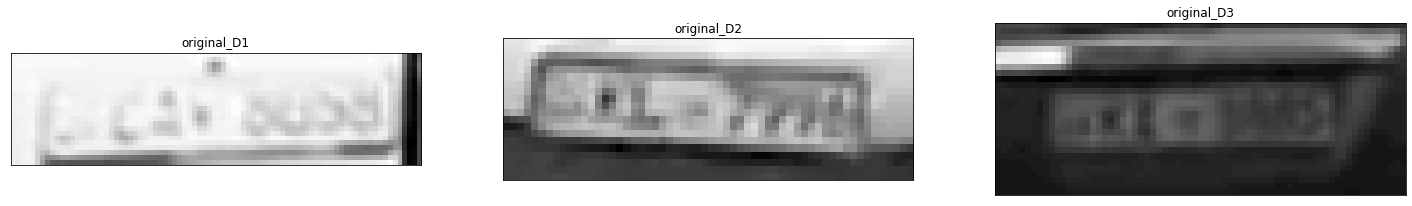

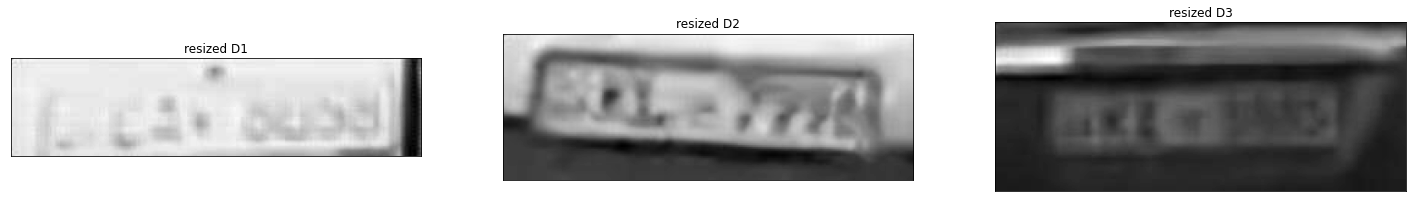

In [911]:
plot(imgD1,imgD2,imgD3,"original_D1","original_D2","original_D3")
plot(rD1,rD2,rD3,"resized D1","resized D2","resized D3")

# Spatial domain filtering

In [912]:
def pow_transform(img, gamma =1.0):
 lookUpTable = np.empty((1,256), np.uint8)
 lst = np.arange (0,256,1)
 for i in lst:
  #build a lookup table mapping the pixel values [0, 255] to their gamma values
  #np.clip is used to clip the values outside the range [0,255] to the interval edges
  lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
  #apply the power-law transformation to the image
 return cv2.LUT(img , lookUpTable)

# Power transformation, Gamma correction

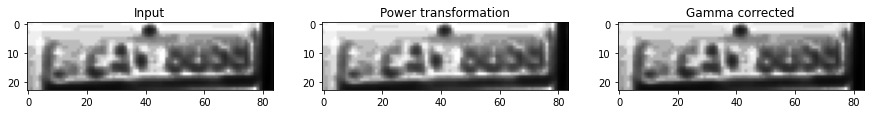

In [913]:
equalized = cv2.equalizeHist(imgD1)
fig = plt.figure(figsize = (15,15))
power = 0.9
#display original image
fig.add_subplot(1,3,1)
plt.imshow(equalized, cmap = 'gray')
plt.title('Input')
#image after power transformation
fig.add_subplot(1,3,2)
plt.imshow(pow_transform(equalized,power), cmap = 'gray')
plt.title('Power transformation')
#gamma corrected
corrected = pow_transform(equalized,1/15)
fig.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(pow_transform(corrected,15),cv2.COLOR_BGR2RGB))
plt.title('Gamma corrected')
plt.savefig("Gamma corrected.png")
#show the plot
plt.show()
pow_trans= pow_transform(equalized,power)

# Gray level slicing

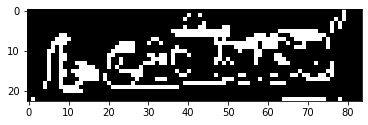

In [914]:
start = 100
end = 150
max = 255
#gray level slice the image
sliced = gray_slice(equalized, start,end,max,0)
plt.imshow(sliced)

# Bitplane slicing

In [915]:
def bit_plane(img,plane):
 #in each pixel's intensity,get the value of the bit in position given by plane variable 
 return np.array((img>>plane & 1))

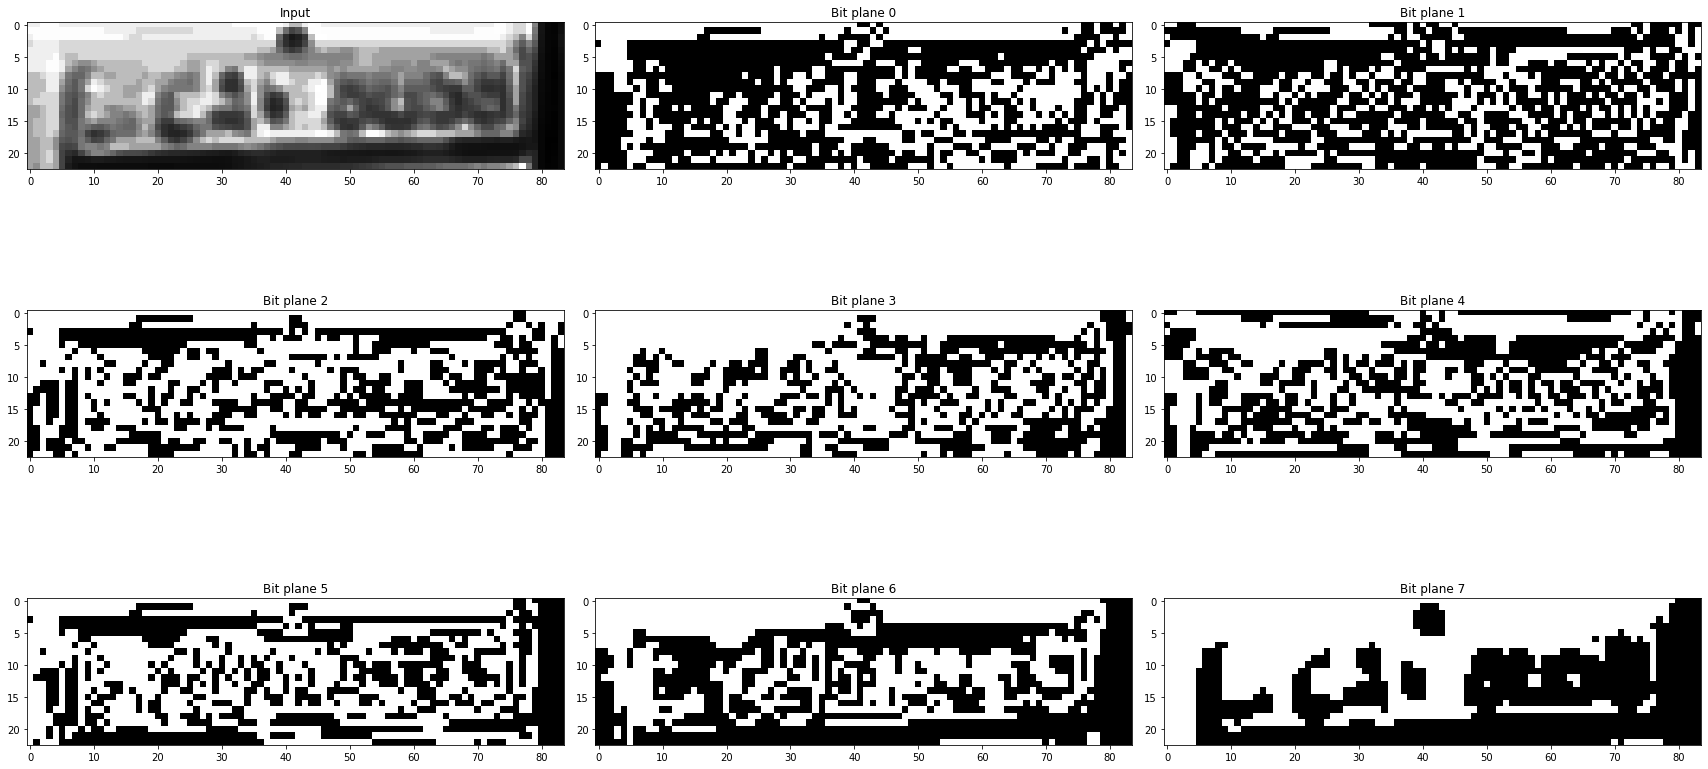

In [916]:
task3_e = equalized
rows_cols = (3,9)
fig = plt.figure(figsize = (30,15))
#display original image
original = plt.subplot2grid(shape=rows_cols, loc=(0, 0), colspan=3, rowspan = 1)
original.imshow(task3_e, cmap='gray', vmin=0, vmax=255)
original.set_title('Input')
#image in bit plane 0
plane= bit_plane(task3_e,0)
plane0 = plt.subplot2grid(shape=rows_cols, loc=(0, 3), colspan=3, rowspan = 1)
plane0.imshow(plane,cmap ='gray')
plane0.set_title('Bit plane 0')
#image in bit plane 1
plane= bit_plane(task3_e,1)
plane1 = plt.subplot2grid(shape=rows_cols, loc=(0, 6), colspan=3, rowspan = 1)
plane1.imshow(plane,cmap ='gray')
plane1.set_title('Bit plane 1')
#image in bit plane 2
plane= bit_plane(task3_e,2)
plane2 = plt.subplot2grid(shape=rows_cols, loc=(1, 0), colspan=3, rowspan = 1)
plane2.imshow(plane,cmap ='gray')
plane2.set_title('Bit plane 2')
#image in bit plane 3
plane= bit_plane(task3_e,3)
plane3 = plt.subplot2grid(shape=rows_cols, loc=(1, 3), colspan=3, rowspan = 1)
plane3.imshow(plane,cmap ='gray')
plane3.set_title('Bit plane 3')
#image in bit plane 4
plane= bit_plane(task3_e,4)
plane4 = plt.subplot2grid(shape=rows_cols, loc=(1, 6), colspan=3, rowspan = 1)
plane4.imshow(plane,cmap ='gray')
plane4.set_title('Bit plane 4')
#image in bit plane 5
plane= bit_plane(task3_e,5)
plane5 = plt.subplot2grid(shape=rows_cols, loc=(2, 0), colspan=3, rowspan = 1)
plane5.imshow(plane,cmap ='gray')
plane5.set_title('Bit plane 5')
#image in bit plane 6
plane= bit_plane(task3_e,6)
plane6 = plt.subplot2grid(shape=rows_cols, loc=(2, 3), colspan=3, rowspan = 1)
plane6.imshow(plane,cmap ='gray')
plane6.set_title('Bit plane 6')
#image in bit plane 7
plane= bit_plane(task3_e,7)
plane7 = plt.subplot2grid(shape=rows_cols, loc=(2, 6), colspan=3, rowspan = 1)
plane7.imshow(plane,cmap ='gray')
plane7.set_title('Bit plane 7')
#show the plot
plt.show()

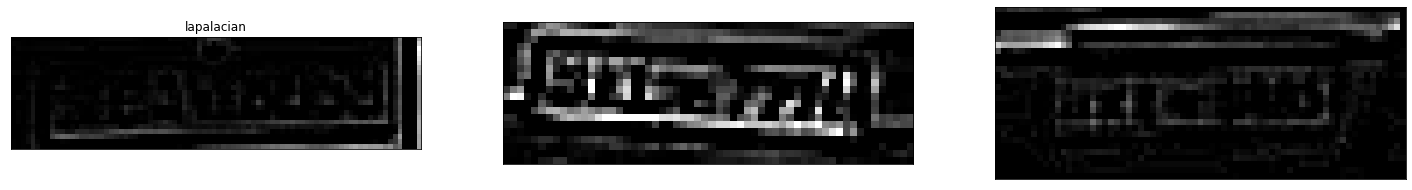

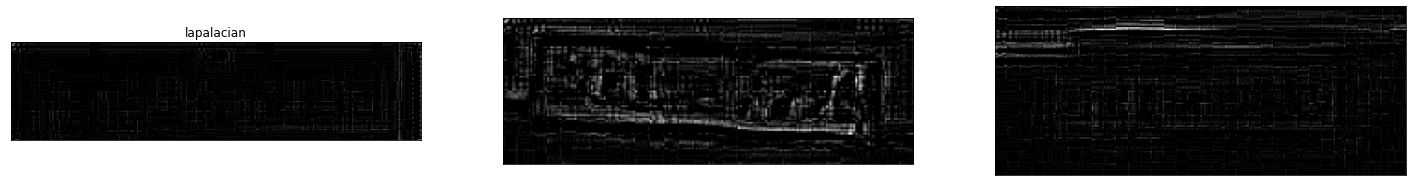

In [917]:
filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
filtered1 = cv2.filter2D(imgD1, -1, filter)
filtered2 = cv2.filter2D(imgD2, -1, filter)
filtered3 = cv2.filter2D(imgD3, -1, filter)
plot(filtered1,filtered2,filtered3,"lapalacian")

filtered4 = cv2.filter2D(rD1, -1, filter)
filtered5 = cv2.filter2D(rD2, -1, filter)
filtered6 = cv2.filter2D(rD3, -1, filter)
plot(filtered4,filtered5,filtered6,"lapalacian")

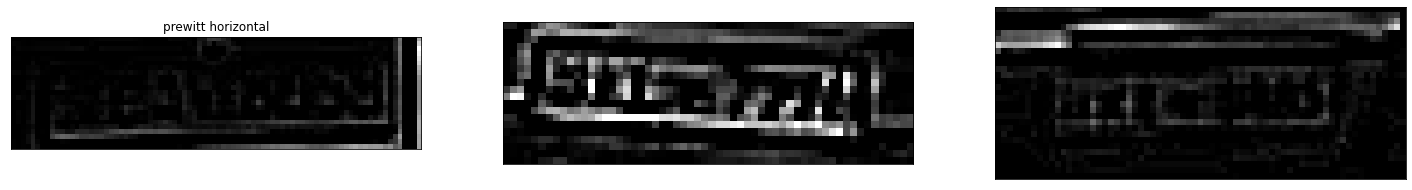

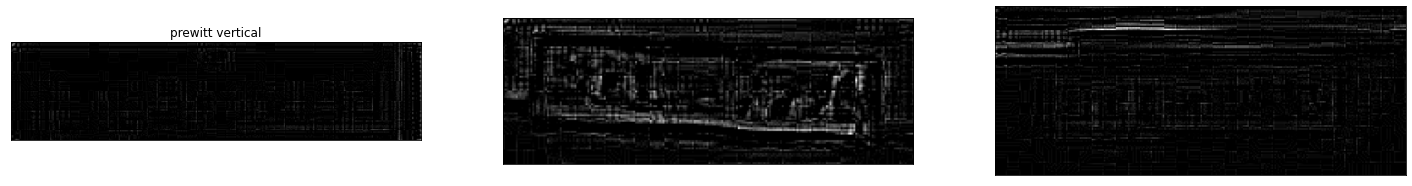

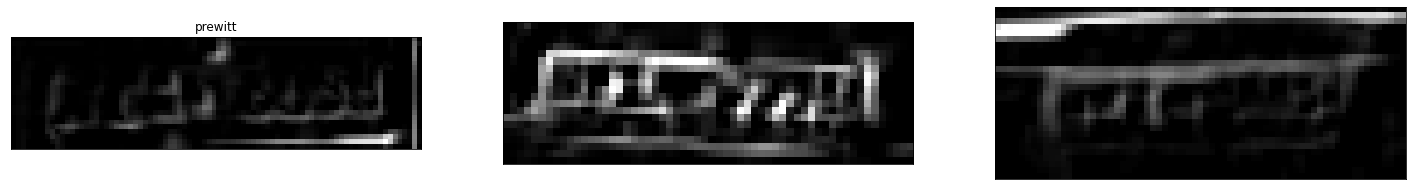

In [918]:
# original
filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
filtered1h = cv2.filter2D(imgD1, -1, filter)
filtered2h = cv2.filter2D(imgD2, -1, filter)
filtered3h = cv2.filter2D(imgD3, -1, filter)
plot(filtered1,filtered2,filtered3,"prewitt horizontal")

filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
filtered1v = cv2.filter2D(imgD1, -1, filter)
filtered2v = cv2.filter2D(imgD2, -1, filter)
filtered3v = cv2.filter2D(imgD3, -1, filter)
plot(filtered4,filtered5,filtered6,"prewitt vertical")

filtered1 = cv2.add(filtered1h,filtered1v)
filtered2 = cv2.add(filtered2h,filtered2v)
filtered3 =  cv2.add(filtered3h,filtered3v)
plot(filtered1,filtered2,filtered3,"prewitt")

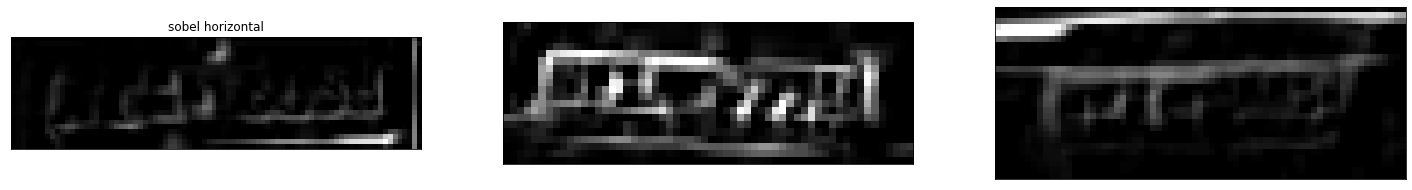

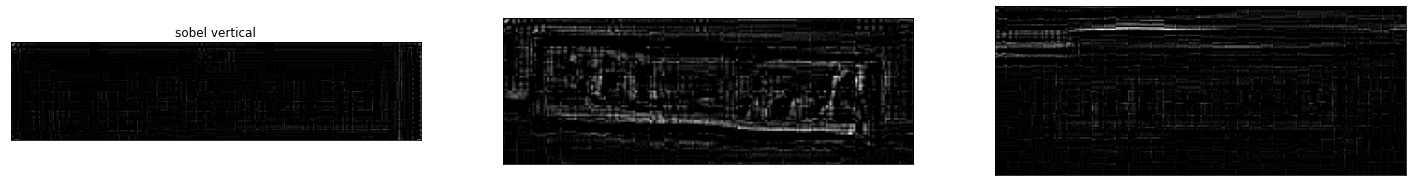

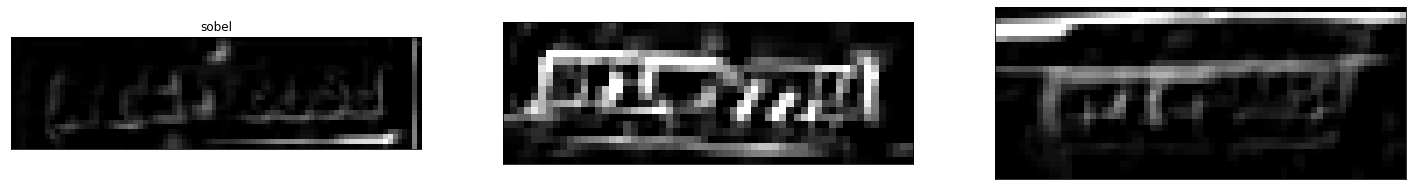

In [919]:
# original
filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filtered1h = cv2.filter2D(imgD1, -1, filter)
filtered2h = cv2.filter2D(imgD2, -1, filter)
filtered3h = cv2.filter2D(imgD3, -1, filter)
plot(filtered1,filtered2,filtered3,"sobel horizontal")

filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered1v = cv2.filter2D(imgD1, -1, filter)
filtered2v = cv2.filter2D(imgD2, -1, filter)
filtered3v = cv2.filter2D(imgD3, -1, filter)
plot(filtered4,filtered5,filtered6,"sobel vertical")

filtered1 = cv2.add(filtered1h,filtered1v)
filtered2 = cv2.add(filtered2h,filtered2v)
filtered3 =  cv2.add(filtered3h,filtered3v)
plot(filtered1,filtered2,filtered3,"sobel")

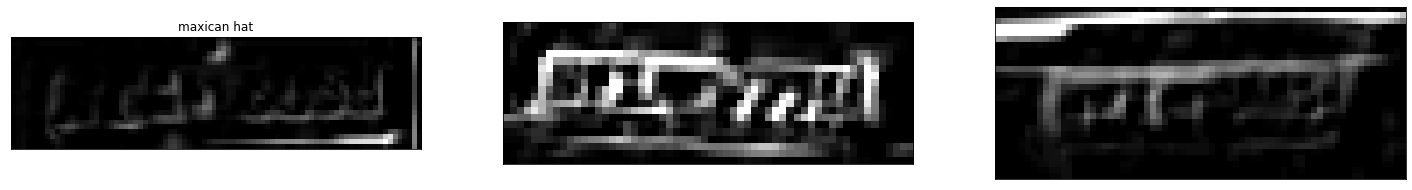

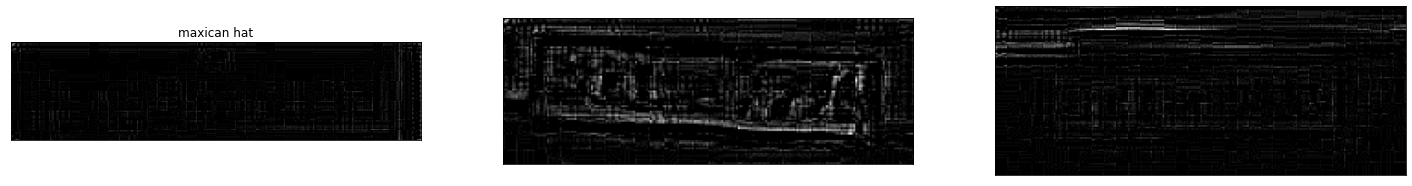

In [920]:
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
filtered1h = cv2.filter2D(rD1, -1, filter)
filtered2h = cv2.filter2D(rD2, -1, filter)
filtered3h = cv2.filter2D(rD3, -1, filter)
plot(filtered1,filtered2,filtered3,"maxican hat")

filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
filtered1v = cv2.filter2D(rD1, -1, filter)
filtered2v = cv2.filter2D(rD2, -1, filter)
filtered3v = cv2.filter2D(rD3, -1, filter)
plot(filtered4,filtered5,filtered6,"maxican hat")

# Frequency domain filtering

laplace filtered image


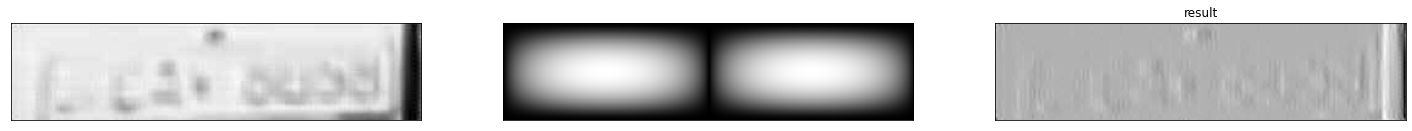

laplace filtered image


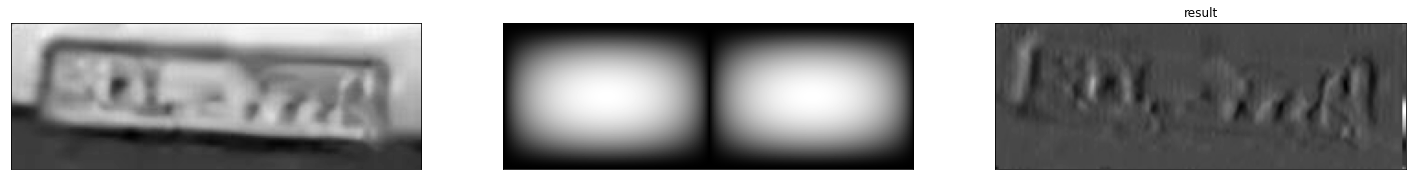

laplace filtered image


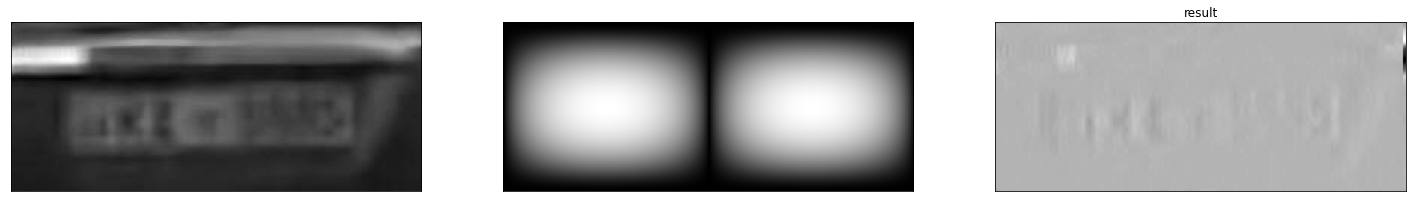

In [921]:
# Laplace kernel
kernel = np.array([[-1, 0, 1],[-2,0, 2],[-1, 0, 1]])

fd_filter(rD1,kernel,"laplace filtered image")
fd_filter(rD2,kernel,"laplace filtered image")
fd_filter(rD3,kernel,"laplace filtered image")

sobel horizontal


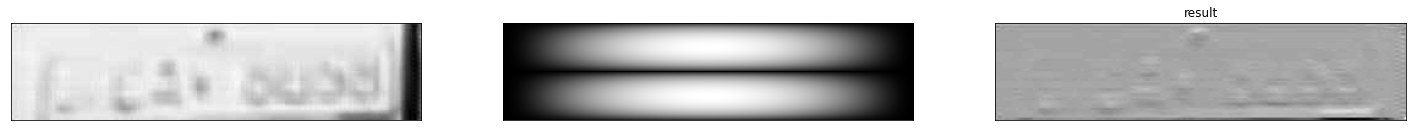

sobel horizontal


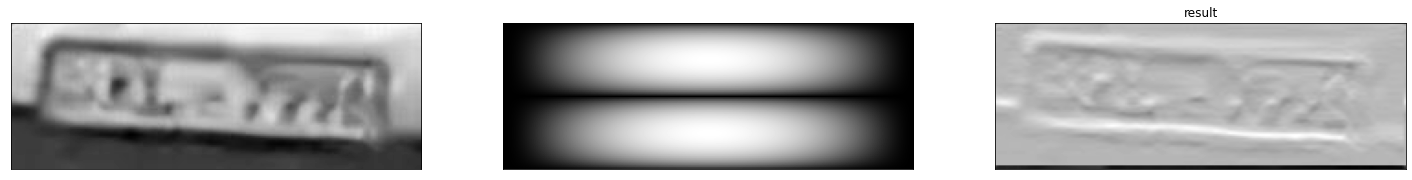

sobel horizontal


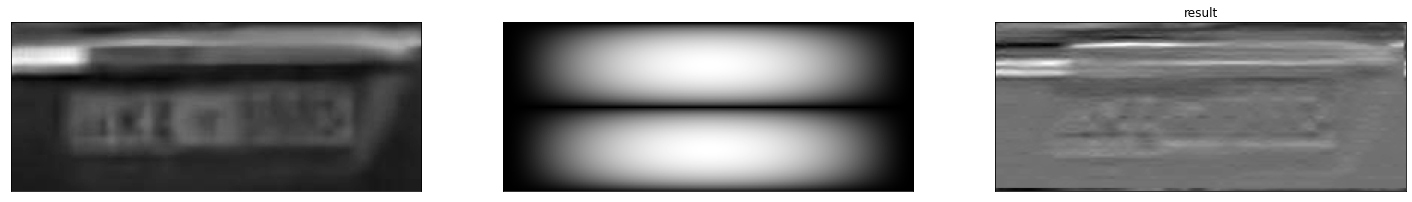

In [922]:
# sobel horizontal
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

fd_filter(rD1,kernel,"sobel horizontal")
fd_filter(rD2,kernel,"sobel horizontal")
fd_filter(rD3,kernel,"sobel horizontal")

sobel vertical


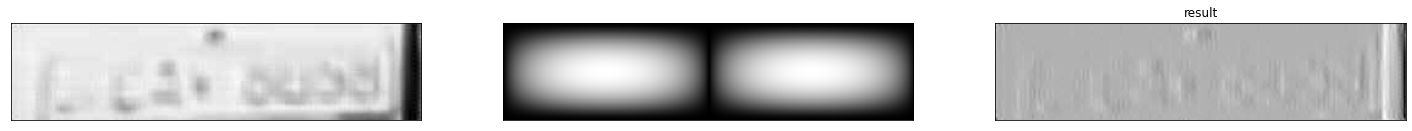

sobel vertical


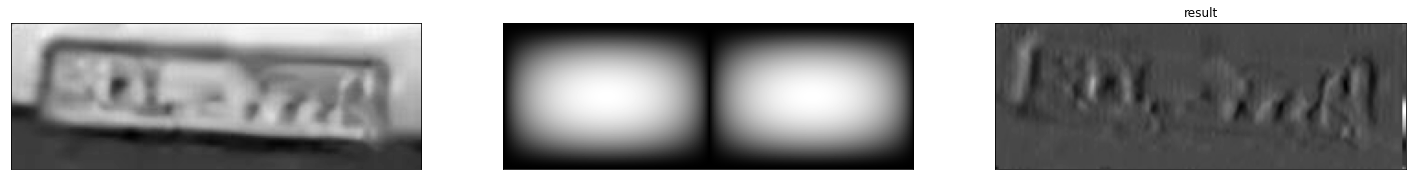

sobel vertical


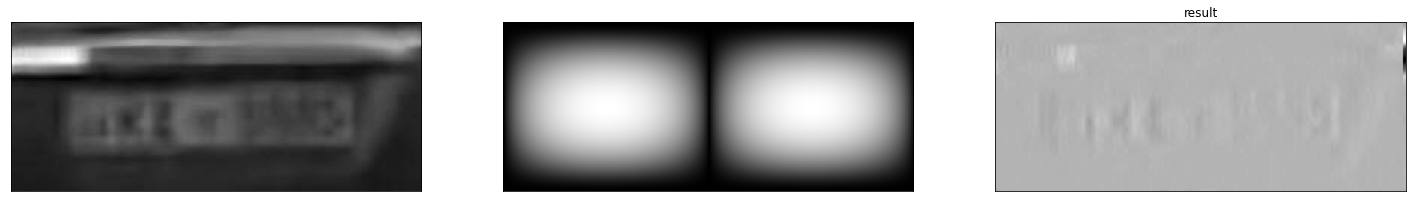

In [923]:
# sobel vertical
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

fd_filter(rD1,kernel,"sobel vertical")
fd_filter(rD2,kernel,"sobel vertical")
fd_filter(rD3,kernel,"sobel vertical")

prewitt horizontal


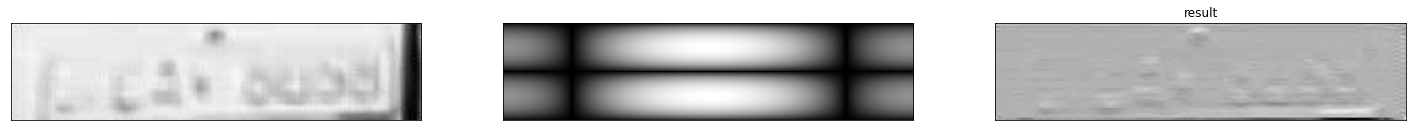

prewitt horizontal


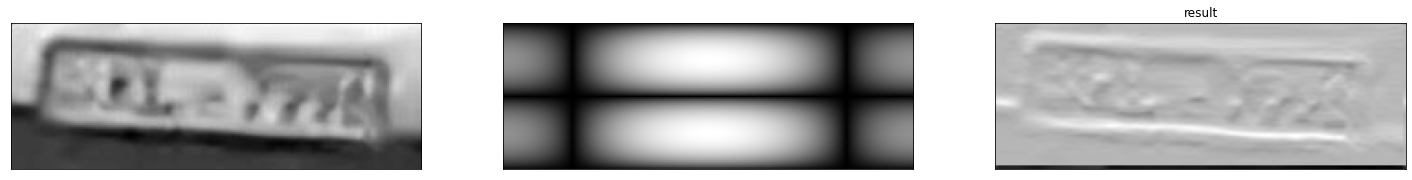

prewitt horizontal


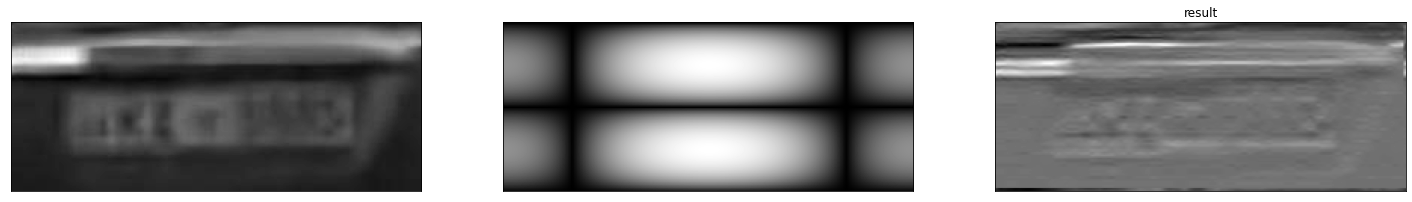

In [924]:
# prewitt horizontal
kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
fd_filter(rD1,kernel,"prewitt horizontal")
fd_filter(rD2,kernel,"prewitt horizontal")
fd_filter(rD3,kernel,"prewitt horizontal")

prewitt vertical


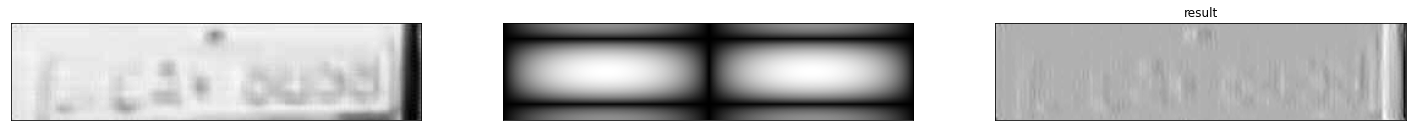

prewitt vertical


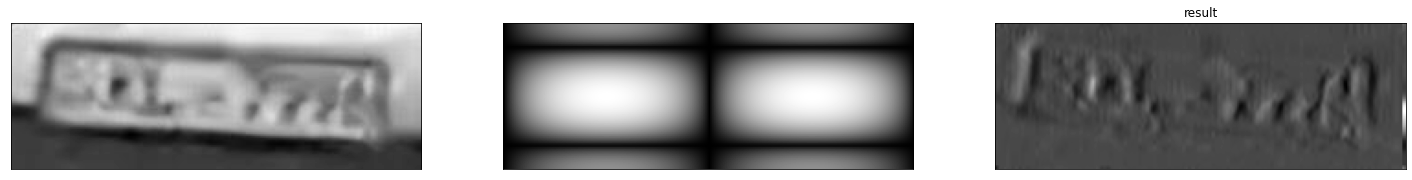

prewitt vertical


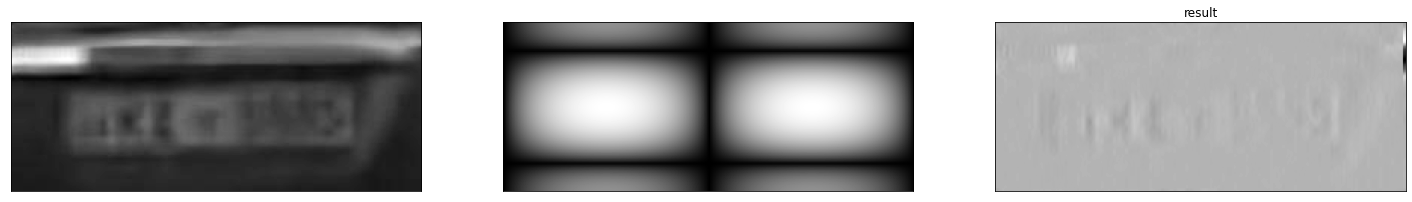

In [925]:
# prewitt vertical
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
fd_filter(rD1,kernel,"prewitt vertical")
fd_filter(rD2,kernel,"prewitt vertical")
fd_filter(rD3,kernel,"prewitt vertical")

###### imgD1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


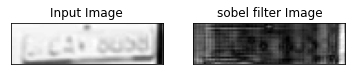

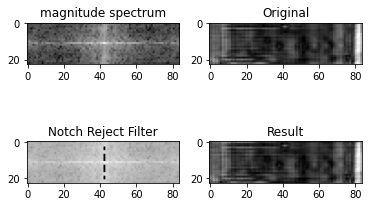

In [926]:
img = imgD1
img_back=apply_sobel(img)
notch_reject(img_back)




###### imgD2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


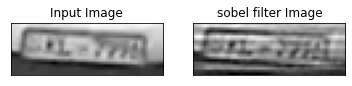

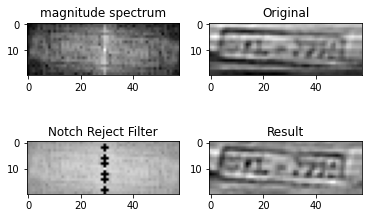

In [927]:
img = imgD2
img_back=apply_sobel(img)
notch_reject(img_back)




###### imgD3



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


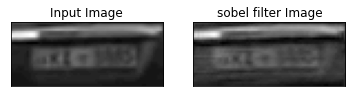

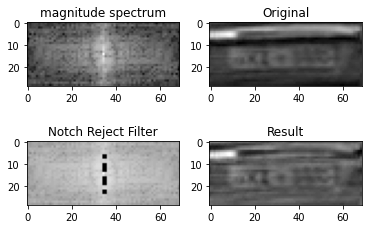

In [928]:
img = imgD3
img_back=apply_sobel(img)
notch_reject(img_back)

### image segmentation




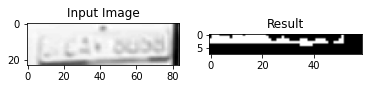

In [929]:
import imutils
img = imgD1
rotate_image = imutils.rotate(img,-3)
window_name='Rotate Image by Angle in Python'
cv2.imwrite('rotated.jpg',rotate_image)
cropped_image = rotate_image[15:, 25:310]

cv2.imwrite("Cropped Image.jpg", cropped_image)

# apply binary thresholding
ret, thresh = cv2.threshold(cropped_image, 210, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imwrite('thresh_image.jpg', thresh)

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = cropped_image.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.imwrite('thresh2.jpg',image_copy)


plt.subplot(121)
plt.imshow(img, "gray") 
plt.title("Input Image")

plt.subplot(122)
plt.imshow(thresh, "gray") 
plt.title("Result")

cv2.imwrite('result_output.png', thresh)

plt.show()

In [930]:
scale_percent = 100 # percent of original size
width = int(imgD1.shape[1] * scale_percent / 100)
height = int(imgD1.shape[0] * scale_percent / 100)
dim = (width, height)
  
resized = cv2.resize(imgD1, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized )

In [931]:
from imutils import paths

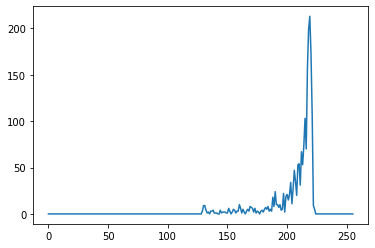

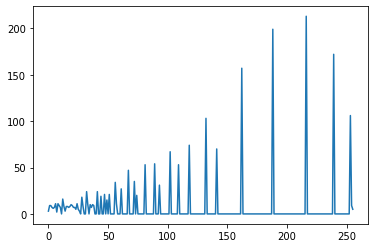

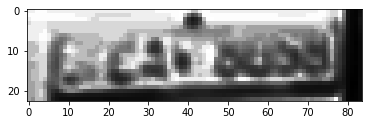

In [932]:
historiginal= cv2.calcHist([resized],[0],None,[256],[0,256])
plt.plot(historiginal)
equalized = cv2.equalizeHist(resized)

cv2_imshow(equalized )
plt.show()
histequalized= cv2.calcHist([equalized],[0],None,[256],[0,256])
plt.plot(histequalized)
plt.show()

plt.imshow(equalized, cmap = 'gray')

Log transformation

In [933]:
cv2_imshow(resized)
img_log = (np.log(equalized+1)/(np.log(1+np.max(equalized))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
cv2_imshow(img_log )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


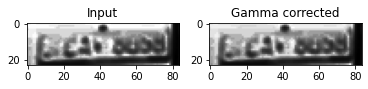

In [934]:
fig = plt.figure()
power = 0.9
#display original image
fig.add_subplot(1,2,1)
plt.imshow(equalized, cmap = 'gray')
plt.title('Input')
#gamma corrected
corrected = pow_transform(equalized,1/15)
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(pow_transform(corrected,15),cv2.COLOR_BGR2RGB))
plt.title('Gamma corrected')
plt.savefig("Gamma corrected.png")
#show the plot
plt.show()
pow_trans= pow_transform(equalized,power)
cv2_imshow(pow_trans)

Contrast stretching


In [935]:
def pixelVal(pix, r1, s1, r2, s2):
 if (0 <= pix and pix <= r1):
  return (s1 / r1)*pix
 elif (r1 < pix and pix <= r2):
  return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
 else:
  return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
 
# function to vectorize the pixelVal() function so that it can be applied to the whole image
def contrast_stretch(img, r1, s1, r2, s2):
 vactorized_func= np.vectorize(pixelVal)
 
 #contrast stretch the whole image
 contrast_stretched = vactorized_func(img, r1, s1, r2, s2)
 
 return contrast_stretched

In [936]:
t=10
r1 = t
s1 = 0
r2 = t
s2 = 225
#contrast stretch the image
stretched = contrast_stretch(pow_trans, r1, s1, r2, s2)
cv2_imshow(stretched )
cv2_imshow(pow_trans)
print(pow_trans[10])

[193 193 193 240 240 149 111  98 127 219 253 240 219 193 193 169 169 169
 193 219 169 140 127 127 127 127 140 193 219 169  83  57  55  81 169 219
 149 118 127 149 193 193 193 219 240 255 254 193 111  76  70  76  90 111
 102  98  90 111 140 102 102 102 102  90  76  70  65  66 102 102  76  57
  55  59  57  98 169  90  65  40  13   7   3  11]


Gray level slicing

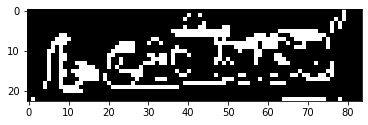

In [937]:
start = 100
end = 150
max = 255
#gray level slice the image
sliced = gray_slice(equalized, start,end,max,0)
plt.imshow(sliced)


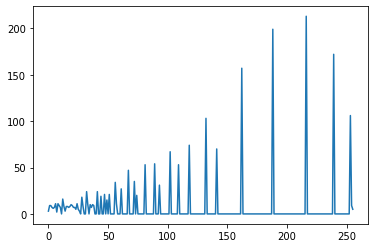

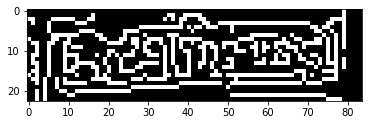

(23, 84)
[162 188 188 216 216 109  81  81 118 141 162 132 132 132 118 109 102 141
 162 162  89  61  61 102 109 118 132 132 109  61  56  49  49  56  81 162
 188 141  81  89 118 188 216 216 216 216 162  93  61  51  56  57  72  81
  72  56  47  47  49  47  56  81  89  67  56  56  67  89 109  89  57  49
  56  67  72 102 132  67  44  25   7   3   1   8]


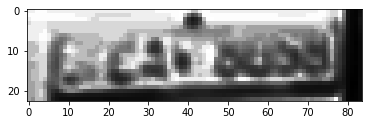

In [938]:
image = equalized

hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
edged = cv2.Canny(image,100,160)
plt.imshow(edged)
plt.show()
plt.imshow(image)
print(image.shape)
print(equalized[15])

In [939]:
import glob

In [940]:
img= pow_trans
cv2_imshow(pow_trans)

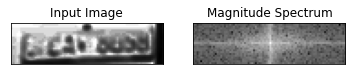

In [941]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

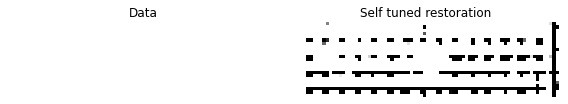

In [942]:
from skimage import color, data, restoration

rng = np.random.default_rng()

astro = equalized
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
#astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

In [943]:
# from skimage import color, data, restoration
# cv2_imshow(pow_trans)
# img =  cv2.imread(folder+"/D1_super.jpg",0)
# from scipy.signal import convolve2d
# psf = np.ones((5, 5)) / 25
# # img = convolve2d(img, psf, 'same')
# # # cv2_imshow(img)
# # img += 0.1 * img.std() * np.random.standard_normal(img.shape)
# deconvolved_img = restoration.wiener(img, psf,33, clip=False)
# cv2_imshow(deconvolved_img)
# plt.imshow(img)

# plt.show()
# plt.imshow(deconvolved_img)

#Image restoration : LOOKS LIKE IMAGES HAVE ADDITIONAL NOISE

https://github.com/maponti/imageprocessing_course_icmc/blob/master/05b_restoration_deconvolution.ipynb

In [944]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift

Gaussian distribution

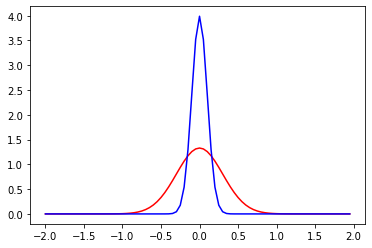

In [945]:
x = np.arange(-2,2,0.05)

# parameter sigma is related to the dispersion of the values
sigma1 = 0.3
gauss1d_1 = (1/(sigma1*np.sqrt(2*np.pi))) * np.exp(-(np.square(x/sigma1)/2))

sigma2 = 0.1
gauss1d_2 = (1/(sigma2*np.sqrt(2*np.pi))) * np.exp(-(np.square(x/sigma2)/2))

plt.plot(x, gauss1d_1, 'r') # larger sigma, 0.3
plt.plot(x, gauss1d_2, 'b') # smaller sigma, 0.1

Create a gaussian filter

In [946]:
def gaussian_filter(k=5, sigma=1.0):
    ''' Gaussian filter
    :param k: defines the lateral size of the kernel/filter, default 5
    :param sigma: standard deviation (dispersion) of the Gaussian distribution
    :return matrix with a filter [k x k] to be used in convolution operations
    '''
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

In [947]:
g1 = gaussian_filter(k=5, sigma=0.9)
print(g1)

[[0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.01675038 0.10672687 0.19785944 0.10672687 0.01675038]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]]


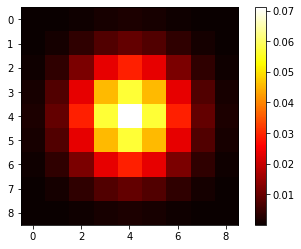

In [948]:
g2 = gaussian_filter(k=9, sigma=1.5)
plt.imshow(g2, cmap='hot', interpolation='nearest')
plt.colorbar()

Simulating Blur


(34, 112)
(34, 112)
(34, 112)
(34, 112)
(34, 112)


Text(0.5, 1.0, 'degraded/blurred image')

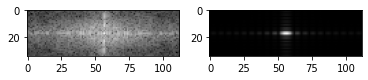

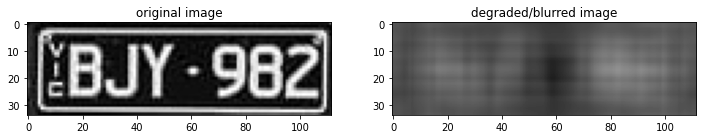

In [949]:
f = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/correct.jpg",0)

print(f.shape)

# scale_percent = 120 # percent of original size
# width = int(img1.shape[1] * scale_percent / 100)
# height = int(img1.shape[0] * scale_percent / 100)
# dim = (100, 100)
# f = cv2.resize(f, dim, interpolation = cv2.INTER_AREA) 
print(f.shape)
h = gaussian_filter(k=20, sigma=20)

# computing the number of padding on one side
a = int(f.shape[0]//2 - h.shape[0]//2)
b = int(f.shape[1]//2 - h.shape[1]//2)

h_pad = np.pad(h, ((a,a),(b,b)), 'constant', constant_values=(0))

# computing the Fourier transforms
F = fftn(f)
print(F.shape)
H = fftn(h_pad)
print(H.shape)
plt.subplot(121)
plt.imshow(fftshift(np.log(np.abs(F)+1)), cmap="gray")
plt.subplot(122)
plt.imshow(fftshift(np.log(np.abs(H)+1)), cmap="gray")

# convolution
G = np.multiply(F,H)
print(G.shape)

# Inverse Transform
# - we have to perform FFT shift before reconstructing the image in the space domain
g = fftshift(ifftn(G).real)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(f, cmap="gray", vmin=0, vmax=255); plt.title("original image")
plt.subplot(122)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")

Text(0.5, 1.0, 'restored image')

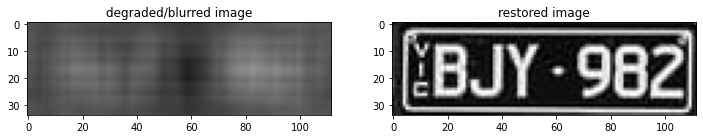

In [950]:
#F_hat = G/H
F_hat = np.divide(G,H)

f_hat = ifftn(F_hat).real

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("restored image")

In [951]:
img1 = rD1 #This is the blurred image. therefore it should be G
G = np.fft.fft2(img1)
g = ifftn(G).real
# G =fftn(img1)
# g = fftshift(ifftn(G).real)

print(G.shape)
h = gaussian_filter(k=5, sigma=2)
a = int(G.shape[0]//2 - h.shape[0]//2)
b = int(G.shape[1]//2 - h.shape[1]//2)


h_pad = np.pad(h, ((a-1,a),(b,b-1)), 'constant', constant_values=(0))
H = fftn(h_pad)
print(H.shape)

(80, 336)
(80, 336)


Text(0.5, 1.0, 'restored image')

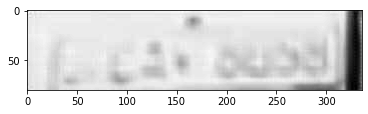

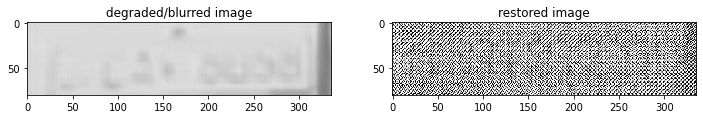

In [952]:
F_hat = np.divide(G,H)

f_hat = fftshift(ifftn(F_hat).real)
plt.imshow(img1,cmap ='gray')

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("restored image")

Wiener Filter

In [953]:
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [954]:
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

In [955]:

def gaussian_kernel(k=5, sigma=1.0):
    ''' Gaussian filter
    :param k: defines the lateral size of the kernel/filter, default 5
    :param sigma: standard deviation (dispersion) of the Gaussian distribution
    :return matrix with a filter [k x k] to be used in convolution operations
    '''
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

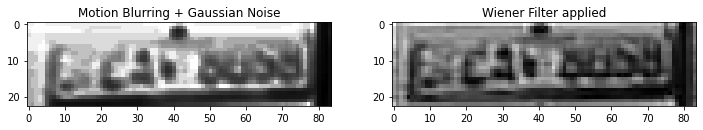

[[348.16864024 232.60827108 247.89981369 ...  58.60904533  79.79224575
  196.22634589]
 [295.35181527 195.45868522 206.54312576 ...  53.32310499  60.93721834
  161.00001985]
 [289.19310963 194.86191961 211.1224692  ...  52.22426455  61.77645373
  159.30690571]
 ...
 [171.08061392 133.95152519 198.39434878 ...  50.31875391  49.84529481
   88.45388514]
 [223.20366088 154.21875951 211.07523122 ...  52.39596985  57.40535737
  113.92286285]
 [278.08295034 171.9565503  213.68149632 ...  57.86256668  66.67902643
  145.05898905]]
[[240 240 253 ...  10   6  17]
 [253 253 253 ...   8   6  19]
 [240 253 253 ...   8   7  24]
 ...
 [169 169 193 ...   1   3  12]
 [169 169 193 ...   1   4  12]
 [169 149 193 ...   3   4  12]]


In [956]:
kernel = gaussian_kernel(3,2)
noisy_img = pow_trans
filtered_img = wiener_filter(noisy_img, kernel, K =0.1)

# Display results
display = [ noisy_img, filtered_img]
label = [ 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
  fig.add_subplot(2, 2, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
print(filtered_img)
print(noisy_img)

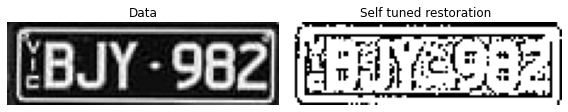

In [957]:
from skimage import color, data, restoration

rng = np.random.default_rng()

astro = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/correct.jpg",0)
from scipy.signal import convolve2d as conv2
psf = gaussian_filter(k=3, sigma=1)
#astro = conv2(astro, psf, 'same')
#astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()